In [38]:
import numpy as np
from scipy.io.wavfile import read
import wave
import matplotlib.pyplot as plt
from scipy import signal

In [4]:
def resample(self, data, input_rate):
    """
    Microphone may not support our native processing sampling rate, so
    resample from input_rate to RATE_PROCESS here for webrtcvad and
    deepspeech

    Args:
        data (binary): Input audio stream
        input_rate (int): Input audio rate to resample from
    """
    # read data in as a string and create a 1D numpy array
    data16 = np.fromstring(string=data, dtype=np.int16)
    # RATE_PROCESS= 16000 get the len of the data
    resample_size = int(len(data16) / self.input_rate * self.RATE_PROCESS)
    resample = signal.resample(data16, resample_size)
    resample16 = np.array(resample, dtype=np.int16)
    return resample16.tostring()

In [5]:
data = read("./data/my_recording.wav")

In [6]:
data

(48000, array([ 0, -1,  3, ..., 31, 30, 31], dtype=int16))

In [8]:
type(data)

tuple

In [10]:
data[1]

array([ 0, -1,  3, ..., 31, 30, 31], dtype=int16)

In [12]:
data_arr = np.array(data[1])

In [13]:
data_arr.ndim

1

In [15]:
data_arr.shape

(393216,)

In [18]:
signal = wave.open("./data/my_recording.wav", "r")

In [19]:
signal

In [20]:
signal.getnchannels()

1

In [22]:
frames = signal.readframes(-1)

In [24]:
type(frames)

bytes

In [27]:
data16 = np.frombuffer(frames, dtype=np.int16)

In [28]:
data16

array([ 0, -1,  3, ..., 31, 30, 31], dtype=int16)

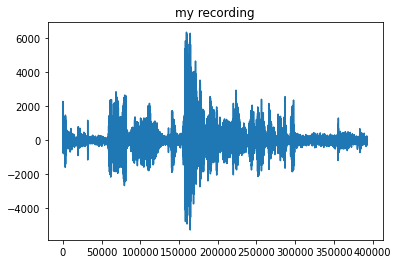

In [30]:
plt.figure(1)
plt.title("my recording")
plt.plot(data16)
plt.show()

In [35]:
resample_size = int(len(data16) / 48000 * 16000)

resample_size, len(data16)

(131072, 393216)

In [36]:
len(data16) / resample_size


3.0

In [39]:
resample = signal.resample(data16, resample_size)
resample16 = np.array(resample, dtype=np.int16)
#     return resample16.tostring()

In [40]:
resample16

array([ 32, -33,  47, ...,  14,  45,  15], dtype=int16)

In [41]:
len(resample16)

131072

In [45]:
#resample16.tostring() # returns binary data after resample